# Checkpoint 1

##### By Emily McNichol again

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random as rd 
#just in case

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv("states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
# i want so badly to just remove all the NaN you dont even know i know its bad practice but snip snip
df.rename({"GRADES_PK_G": "PREK",
          "GRADES_KG_G": "KINDER",
          "GRADES_4_G": "GR4",
          "GRADES_8_G": "GR8",
          "GRADES_12_G": "GR12",
          "GRADES_1_8_G": "GR1to8",
          "GRADES_9_12_G": "GRHS",
          "GRADES_ALL_G": "ALLGR",
          "ENROLL": "ALL_EST"},
         axis=1, inplace = True)

print(df["AVG_MATH_4_SCORE"].isna().sum(), "values are NaN")
print(df["AVG_MATH_4_SCORE"].notna().sum(), "values are valid")
df.dropna(subset =["AVG_MATH_4_SCORE"], inplace = True)
print("Now", df["AVG_MATH_4_SCORE"].isna().sum(), "values are NaN")
print("Still",df["AVG_MATH_4_SCORE"].notna().sum(), "values are valid")

1150 values are NaN
565 values are valid
Now 0 values are NaN
Still 565 values are valid


In [5]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GR4,GR8,GR12,GR1to8,GRHS,ALLGR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [6]:
print(len(df['YEAR'].unique()), "years of data are logged in our dataset")

13 years of data are logged in our dataset


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [7]:
#idk if this was cringe or not to do but i think its cute
state_df = df.set_index('STATE')
rival_df = state_df.loc[['MICHIGAN', 'OHIO'], 'AVG_MATH_4_SCORE']
print("Michigan's average outcome score across all years is:", rival_df.loc['MICHIGAN'].mean())
print("Ohio's average outcome score across all years is:", rival_df.loc['OHIO'].mean())
print("Ohio has the higher score :(")

Michigan's average outcome score across all years is: 234.36363636363637
Ohio's average outcome score across all years is: 239.45454545454547
Ohio has the higher score :(


Find the average for your outcome score across all states in 2019

In [8]:
year_df = df.set_index('YEAR')
year_df
print("Average math grade 4 score:", year_df.loc[2019, 'AVG_MATH_4_SCORE'].mean())
print("We are less than average in 4th grade math but so is Ohio so lets goooooo!!")

Average math grade 4 score: 239.9433962264151
We are less than average in 4th grade math but so is Ohio so lets goooooo!!


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [9]:
#i hated this btw
maxscore = df.groupby(['STATE'], sort = True)['AVG_MATH_4_SCORE'].max()
maxscore

STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [10]:
df['PERCENT_SCHOOL'] = df['TOTAL_REVENUE']/df['INSTRUCTION_EXPENDITURE']
df.head()

,PRIMARY_KEY,STATE,YEAR,ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GR8,GR12,GR1to8,GRHS,ALLGR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,PERCENT_SCHOOL
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1.807977
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2.269003
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,1.775296
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,1.828830
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,1.939263


Feature engineering justification: I think that there is likely a correlation between how much funding schools get, and how well students in the state do, so I wanted to analyze how much of the total revenue each state acquires goes towards spending on schools. In the head above, you can see that Alabama spends 1.8% of its total revenue on instruction, Arizona spends 2.27%, and so on.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

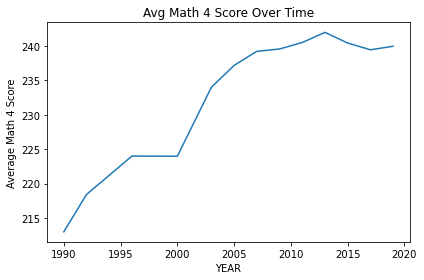

In [11]:
df.groupby('YEAR')['AVG_MATH_4_SCORE'].mean().plot()
plt.ylabel("Average Math 4 Score")
plt.title("Avg Math 4 Score Over Time")
plt.tight_layout()

**Average Math 4 Score Over Time**

**Visualization 2**

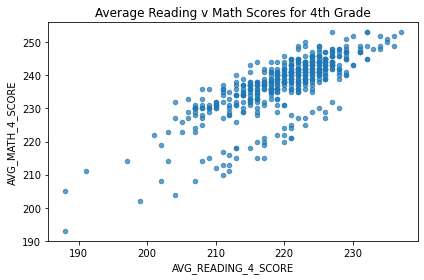

In [12]:
df.plot.scatter(x='AVG_READING_4_SCORE', y = 'AVG_MATH_4_SCORE', alpha = 0.7)
plt.title("Average Reading v Math Scores for 4th Grade")
plt.tight_layout()

**Average Math Scores vs Average Reading Scores for 4th Graders**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [43]:
#dropping all the NaN values so nothing errors
df.dropna(subset =["GR4"], inplace = True)
df.dropna(subset =["AVG_READING_4_SCORE"], inplace = True)

In [44]:
X = df[['GR4', 'AVG_MATH_4_SCORE']]
y = df.loc[X.index]['AVG_READING_4_SCORE']
# trying to predict what an average 4th graders reading score will fall based on their performance in math

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size= 0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [46]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [47]:
# create your model here
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [52]:
RSQ = model.score(X_test, y_test)
RMSE = np.mean((model.predict(X_test)-y_test)**2)**0.5

print("The R^2 value from this model is:", RSQ, "which is a pretty mid-tier R^2 value. It doesn't show a high or low correlation really.")
print("The root mean squared error value is:", RMSE, "which is REALLY BAD LMAO")

The R^2 value from this model is: 0.5896458016222058 which is a pretty mid-tier R^2 value. It doesn't show a high or low correlation really.
The root mean squared error value is: 5.056566078461364 which is REALLY BAD LMAO


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

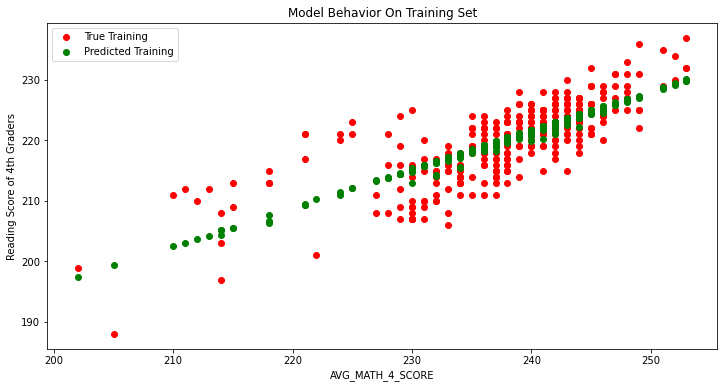

In [53]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading Score of 4th Graders')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

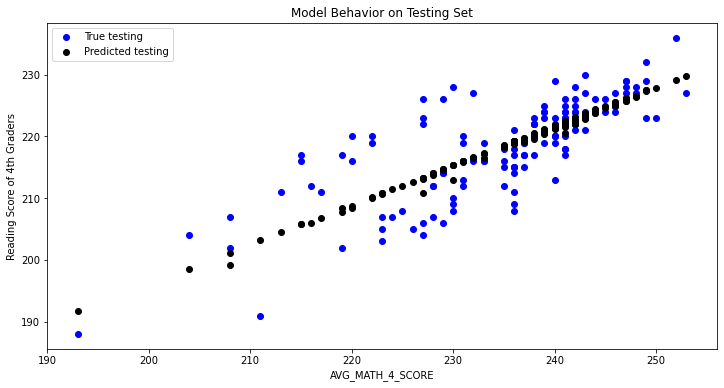

In [54]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading Score of 4th Graders')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

Well. So the math showed that there wasn't really a strong correlation to be found here/this wasn't a great model. But personally, from looking at the graphs, it seems like the predicted testing, while not accurate, did accurately depict the overall _trend_ to be found between a high reading score and a high math score. Usually kids with high math scores also score high in reading! It seems to be more sparse over the training set but that is likely due to more data, while the testing set it fits closer to the line it formed. Overall I'm pretty happy with this even though I kinda cheesed it by picking something with a fairly strong linear trend to begin with.